**Task 1 - Exploration of customer purchasing behavior**

In [1]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.analysis import *
from scripts.logger import setup_logger

**Logger**

In [2]:
logger = setup_logger('eda_logger', '../logs/eda.log')

**Load the data**

In [3]:
data_train = pd.read_csv('../data/train_cleaned.csv',low_memory=False, index_col=False)
data_test=pd.read_csv('../data/test_cleaned.csv', low_memory=False, index_col=False)

**Properties of the Data**

In [4]:
logger.info('Training, test, and store data loaded.')

In [5]:
data_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [6]:
data_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [7]:
data_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422034e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706913e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [8]:
data_test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854361,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352748,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [9]:
data_train.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [10]:
data_test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

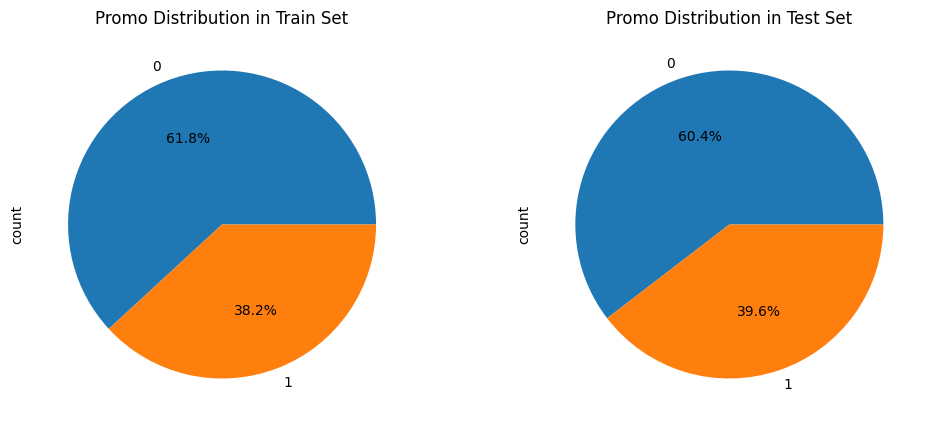

In [11]:
plot_promo_distribution(data_train, data_test)

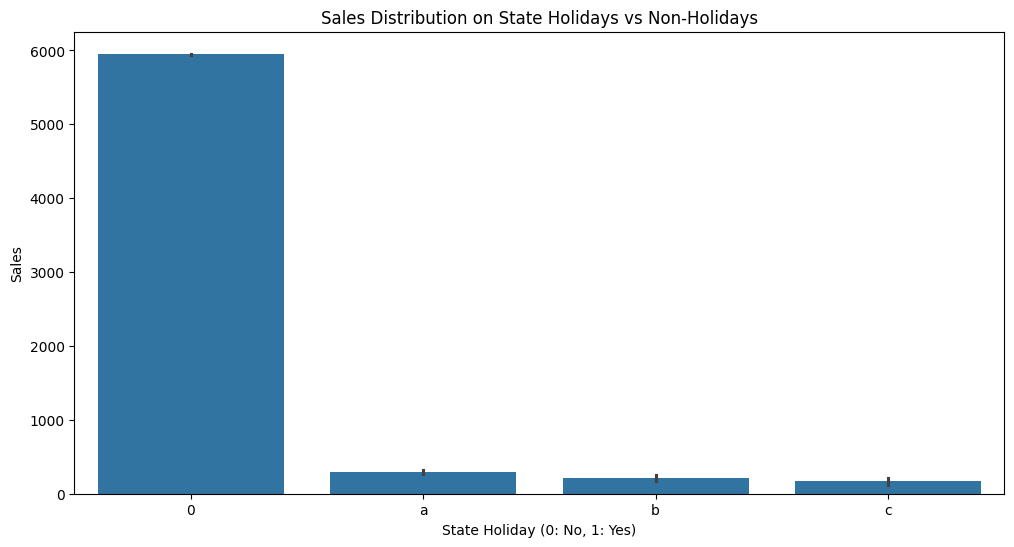

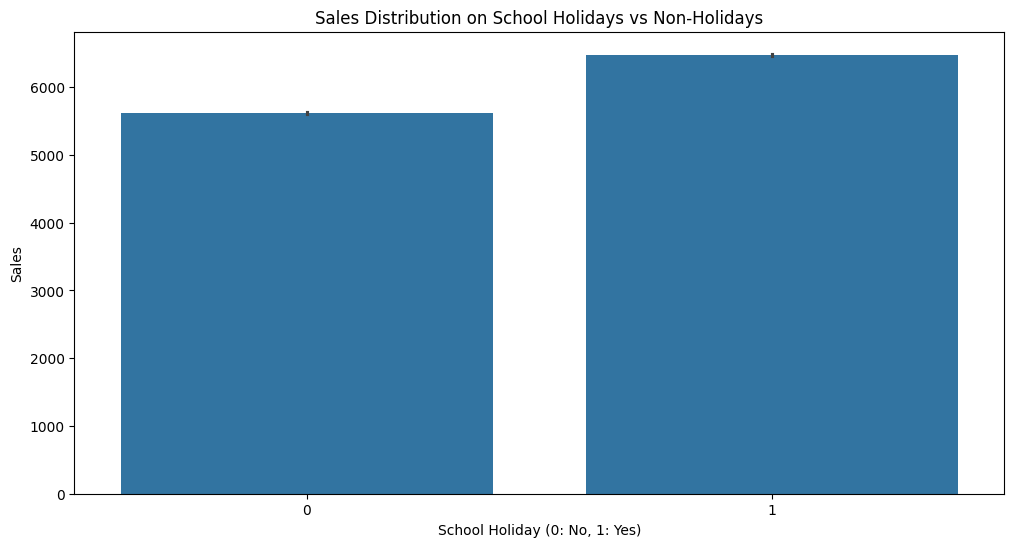

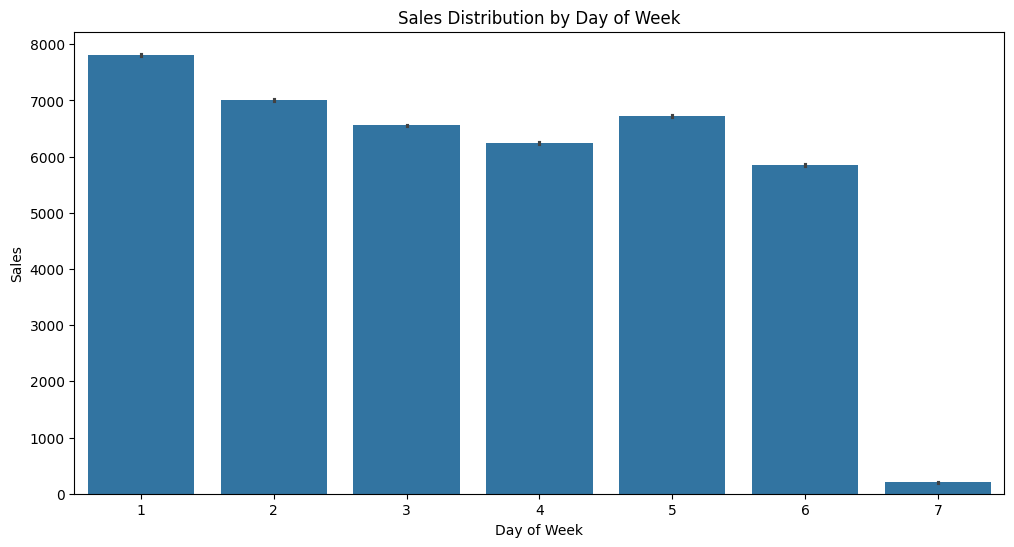

In [12]:
analyze_holiday_sales(data_train)

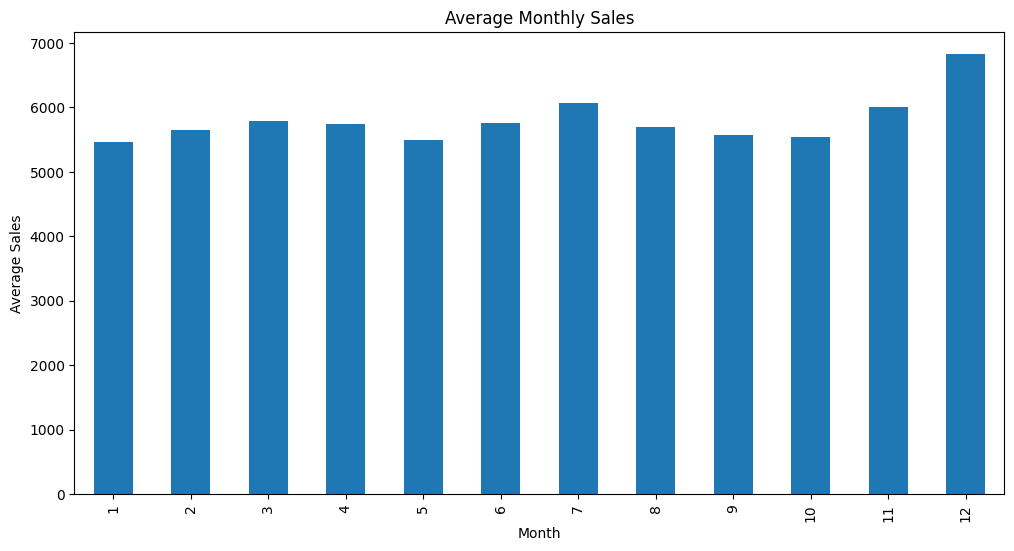

In [13]:
analyze_seasonal_sales(data_train)

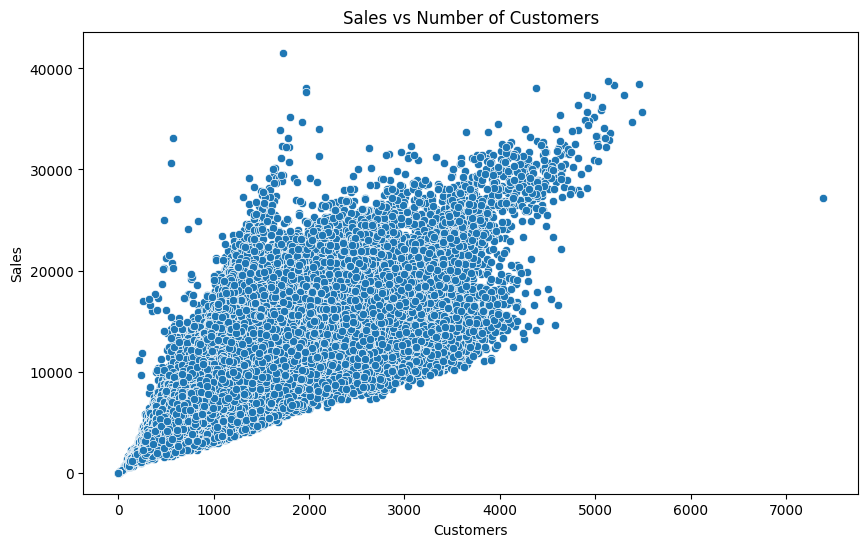

Correlation between Sales and Customers: 0.8947107733016958


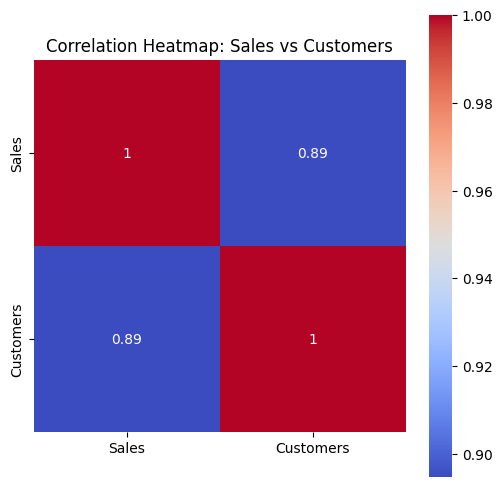

In [14]:
analyze_sales_customers_correlation(data_train)
logger.info("correlation between sales and number of customers")

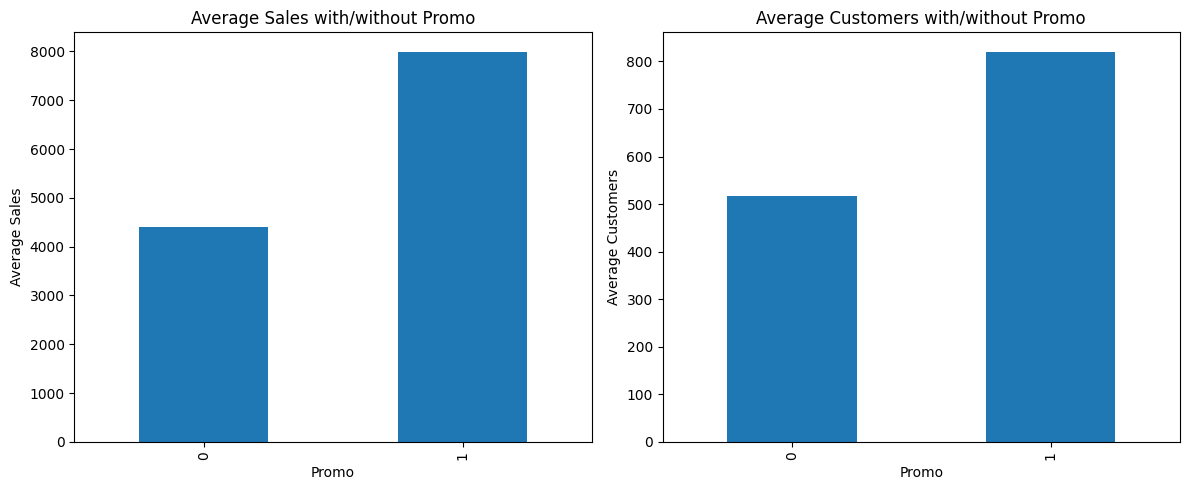

In [15]:
analyze_promo_effect(data_train)

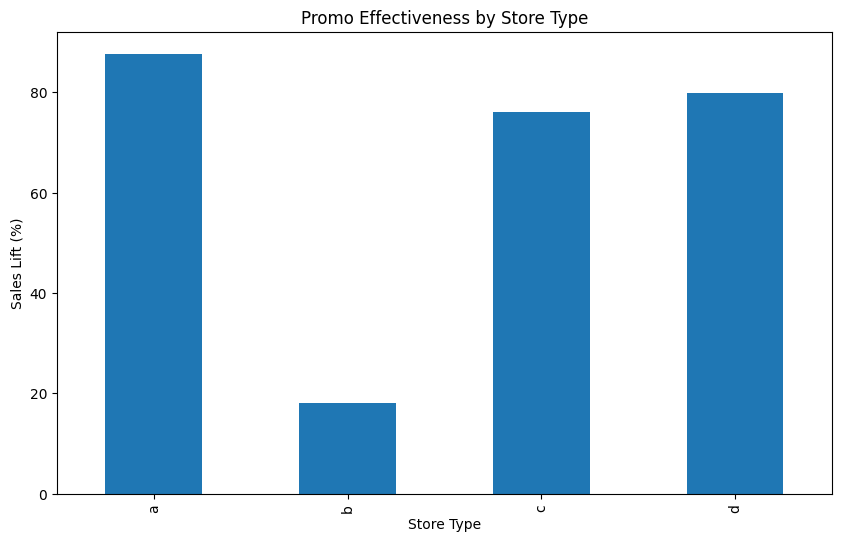

Top 10 stores where promos are most effective:
Store
198     2.258195
607     1.889831
543     1.759064
575     1.737234
271     1.620440
693     1.611931
96      1.575477
1108    1.567058
552     1.562815
635     1.559672
dtype: float64


In [16]:
enhance_promo_analysis(data_train)

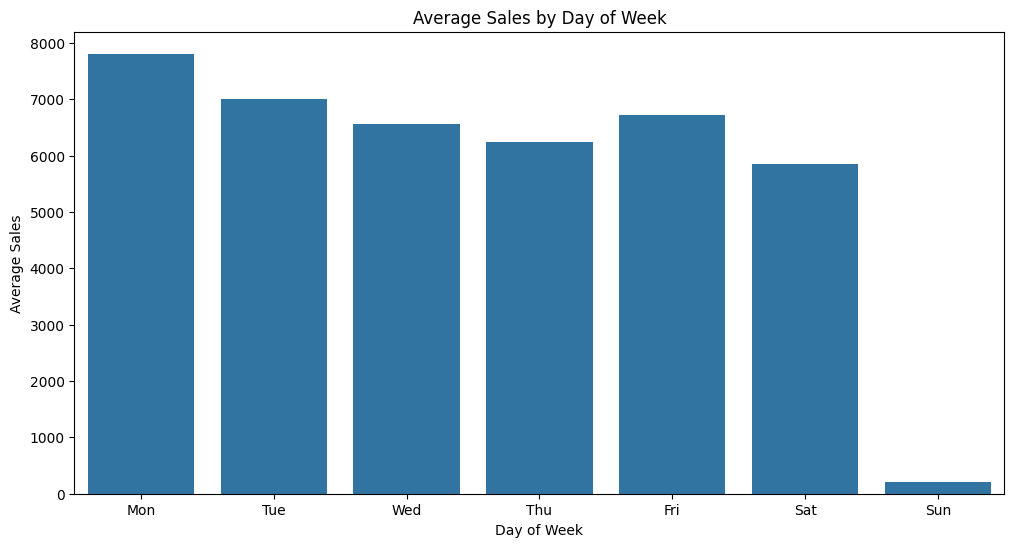

Proportion of stores open by day of week:
DayOfWeek
1    0.950459
2    0.988309
3    0.974400
4    0.923199
5    0.950598
6    0.995357
7    0.024826
Name: Open, dtype: float64

Average sales for open stores by day of week:
DayOfWeek
1    8216.073074
2    7088.113656
3    6728.122978
4    6767.310159
5    7072.677012
6    5874.840238
7    8224.723908
Name: Sales, dtype: float64


In [17]:
analyze_store_hours(data_train)

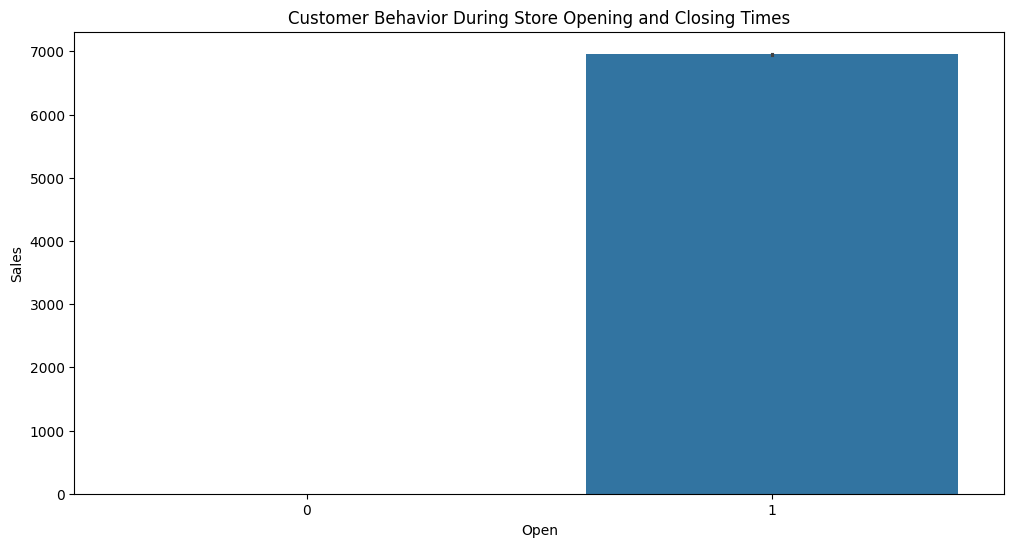

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Open', y='Sales', data=data_train)
plt.title('Customer Behavior During Store Opening and Closing Times')
plt.xlabel('Open')
plt.ylabel('Sales')
plt.show()

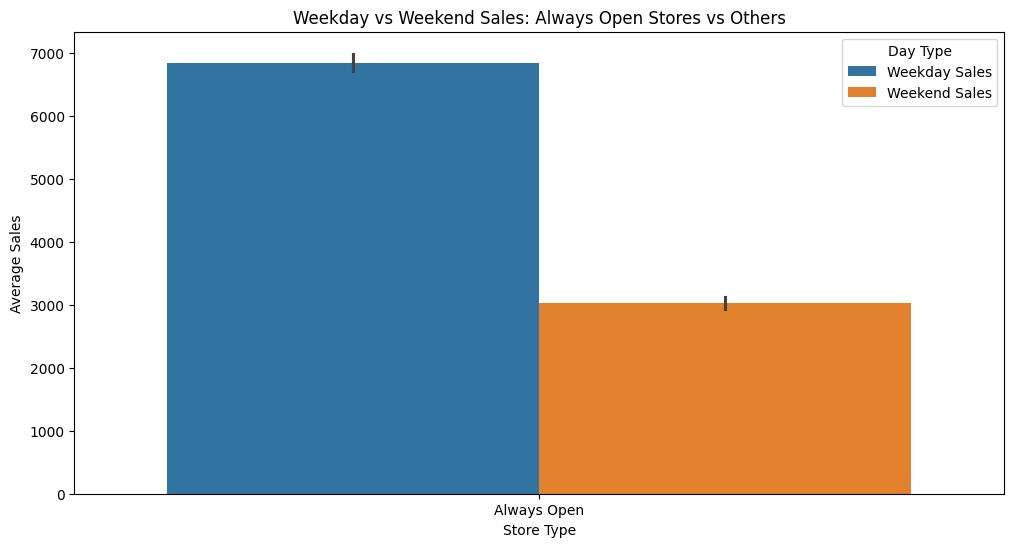

Summary Statistics:
            Weekday Sales              Weekend Sales             
                     mean       median          mean       median
Store Type                                                       
Always Open   6850.073688  6530.900593   3031.040139  2778.347015


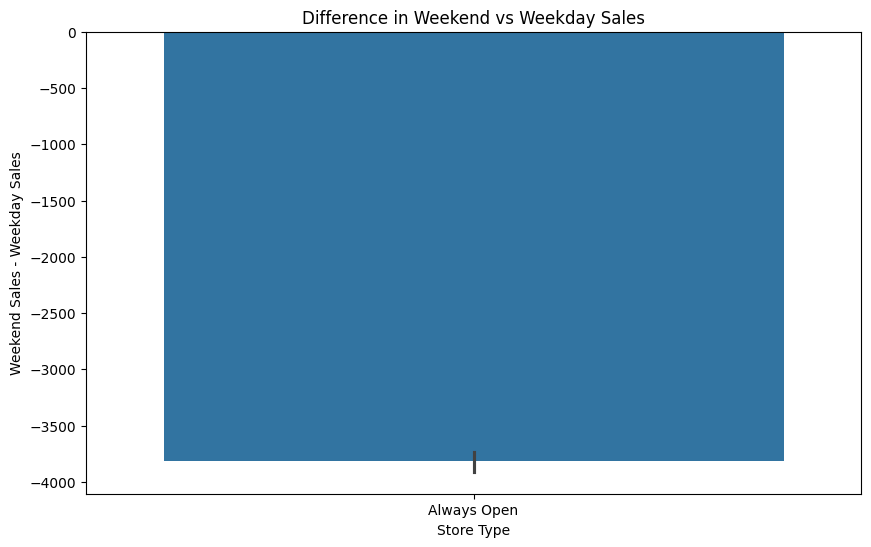


Average difference in Weekend vs Weekday sales:
Store Type
Always Open   -3819.033549
Name: Weekend_Weekday_Diff, dtype: float64


In [19]:
analyze_weekday_open_stores(data_train)

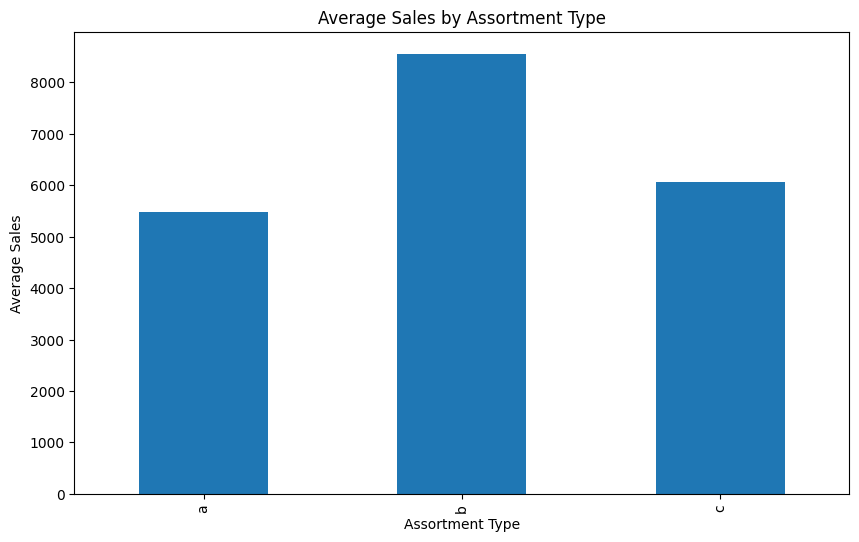

In [20]:
analyze_assortment_effect(data_train)

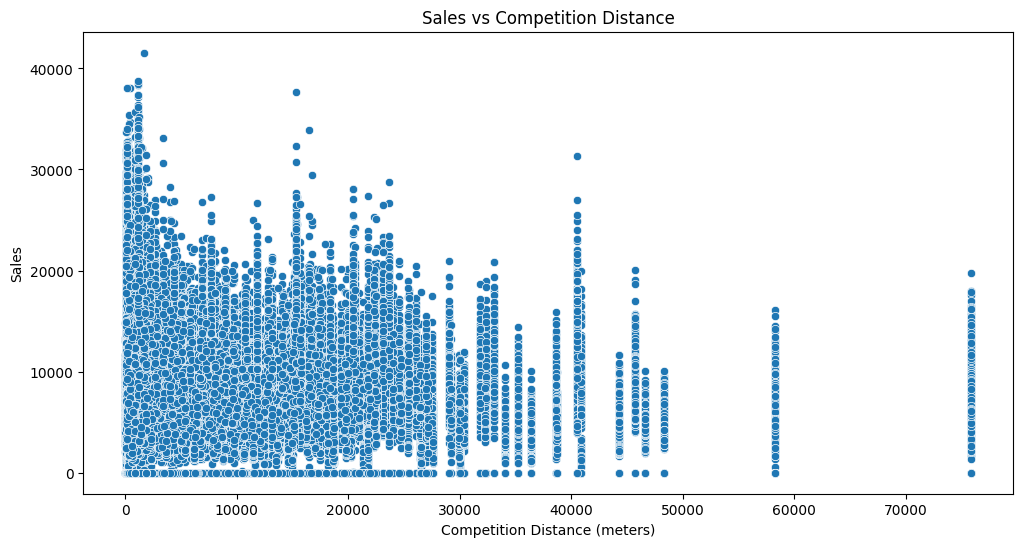

Sales vs Competition Distance (Correlation: -0.02)


In [21]:
analyze_competition_distance(data_train)

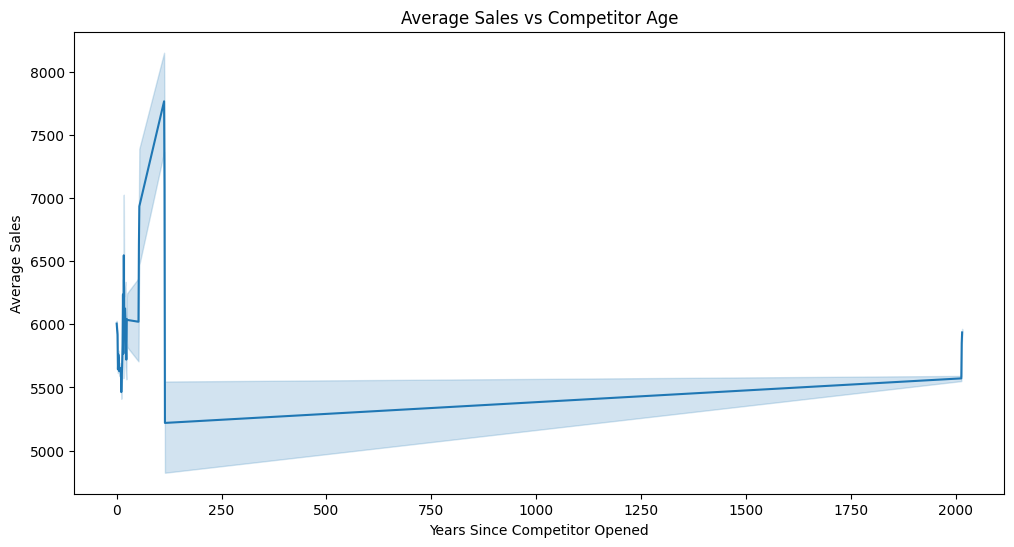

In [22]:
analyze_new_competitors(data_train)

Total stores affected by new competitor opening: 0


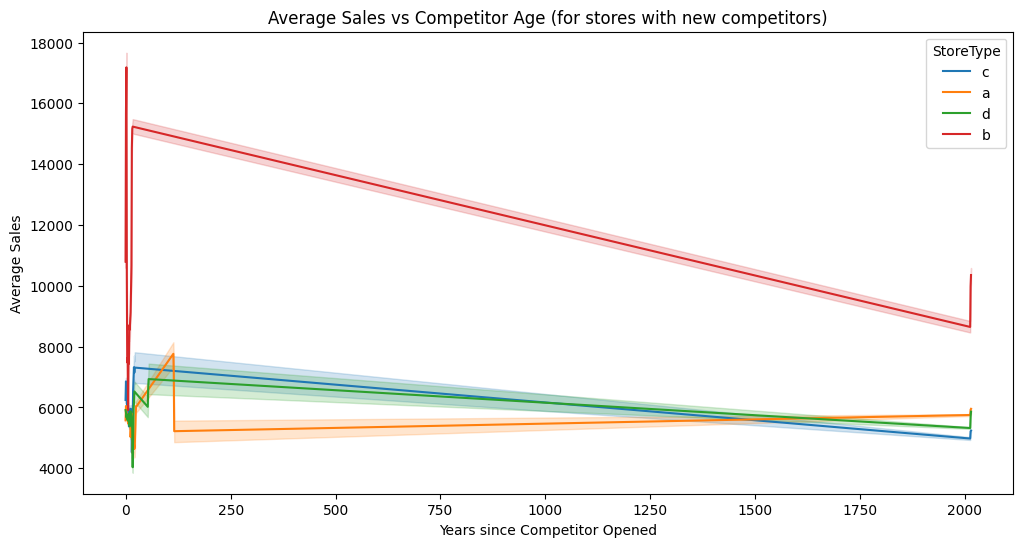

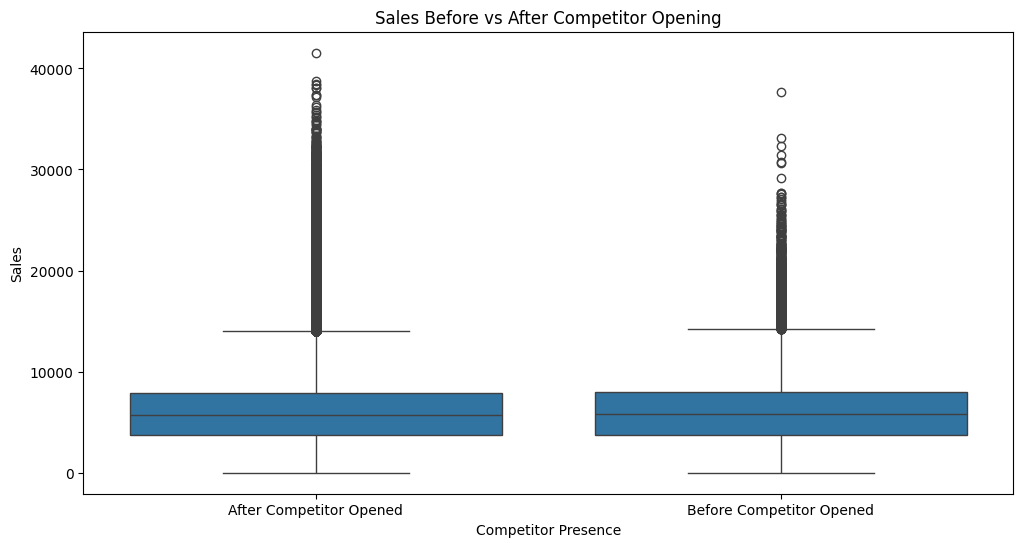

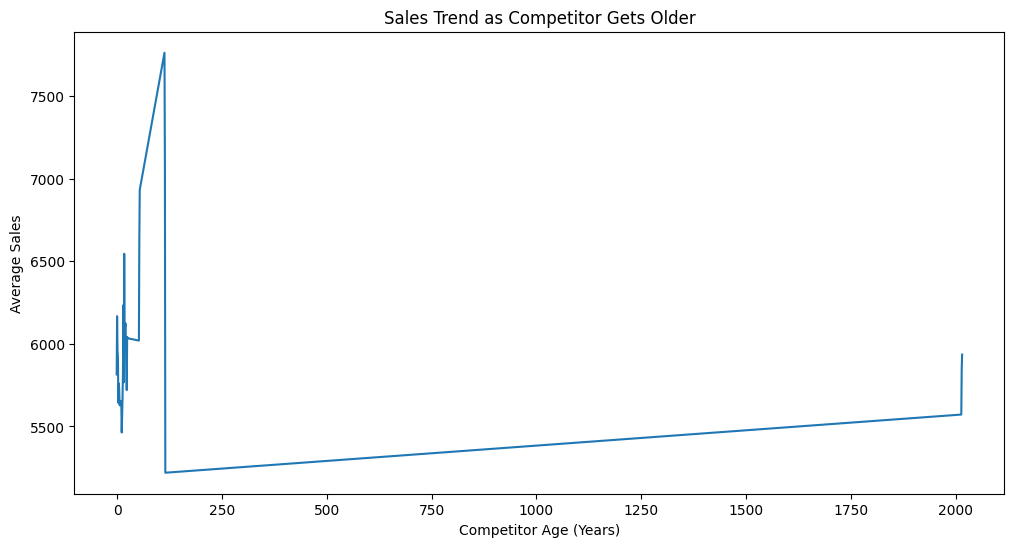

Correlation between Competition Distance and Sales: -0.02


In [23]:
analyze_competitor_effect(data_train)